In [ ]:
#@title Load data

import pandas as pd

# Mengubah link spreadsheet menjadi URL
url = "https://docs.google.com/spreadsheets/d/1UgWa0hSXxldvyj5cX_L5ewyZIzPIAgwU/gviz/tq?tqx=out:csv"

# Membaca file CSV dari URL
df = pd.read_csv(url)

In [ ]:
len(df)

65535

In [ ]:
#@title slicing data hanya menggunakan 1000 data
df = df[0:10001]

In [ ]:
df.head()

,Name,Comment,Time,Likes,Reply Count
0,@teguhhadyanto,Komentar komentar buzzeRp seragam,2/12/24 21:26,1,0.0
1,@ngkimwarkiman5388,Semoga indonesia jangan hanya tinggal nama,2/12/24 21:26,0,0.0
2,@hermawanbasri117,"Tidak sadarkah diri yg memangku amanah, bahwa ...",2/12/24 21:26,0,0.0
3,@winarnijhonwinarnijhon.2018,Sore ini aku mendapatkan amplop dan nama calon...,2/12/24 21:26,0,0.0
4,@rizkifauzan4579,02🎉,2/12/24 21:26,0,0.0


In [ ]:
#@title Install modul sastrawi untuk preprocessing text berbahasa indonesia
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
#@title fungsi cleansing dan preprocess_data untuk memproses text
import string, re

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
factory = StemmerFactory()
Stemmer = factory.create_stemmer()


def preprocess_data(data):
  # cleansing data
  data = cleansing(data)

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  # count vectorizer
  #data = vectorizer.transform([data])
  return data

def cleansing(data):
  #lower text
  data = data.lower()

  #hapus punctuation
  remove =string.punctuation
  translator = str.maketrans(remove,' '*len(remove))
  data = data.translate(translator)

  #remove ASCII dan unicode
  data = data.encode('ascii','ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'', data)

  #remove newline
  data = data.replace('\n','')

  return data



In [ ]:
#@title fungsi penghitung kata
def count_word(sentence, word):
  """
  Menghitung jumlah kemunculan kata dalam kalimat.

  Args:
    sentence: Kalimat yang ingin dihitung.
    word: Kata yang ingin dicari.

  Returns:
    Jumlah kemunculan kata dalam kalimat.
  """

  count = 0
  for i in range(len(sentence)):
    if sentence[i:i+len(word)] == word:
      count += 1

  return count

In [ ]:
#@title Preprocessing Text
df['Comment'] = [preprocess_data(df['Comment'][i]) for i in range(len(df))]

In [ ]:
#@title Sortir Komentar Berdasarkan Like
df.sort_values(by="Likes", ascending=False).head()

,Name,Comment,Time,Likes,Reply Count
9510,@kaygeto6413,apresiasi besar besar kpd semua yg buat susun ...,2/12/24 16:21,964,38.0
6042,@m.sukranhamidy2126,dirty vote simbol suara hati anak bangsa banya...,2/12/24 18:14,912,38.0
8926,@spbucaile3001,anak yg umur 2 tahun hari ayah sedang menonton...,2/12/24 16:42,841,29.0
6214,@bayurizaldy6468,nyata lama saya salah pilih paslon terimakasih...,2/12/24 18:09,717,30.0
7143,@linglungtv9822,terima kasih tim tugas buat dokumenter sejarah...,2/12/24 17:41,664,19.0


In [ ]:
#@title Sortir Komentar Berdasarkan Reply Count
df.sort_values(by="Reply Count", ascending=False).head()

,Name,Comment,Time,Likes,Reply Count
6667,@dianbagchi6006,pikir pilih baik maaf lihat film putus pilih l...,2/12/24 17:54,496,91.0
8235,@HIDZ.,pshkindonesia lihat jelas tim baru buka curang...,2/12/24 17:04,2,59.0
6042,@m.sukranhamidy2126,dirty vote simbol suara hati anak bangsa banya...,2/12/24 18:14,912,38.0
9510,@kaygeto6413,apresiasi besar besar kpd semua yg buat susun ...,2/12/24 16:21,964,38.0
6214,@bayurizaldy6468,nyata lama saya salah pilih paslon terimakasih...,2/12/24 18:09,717,30.0


In [ ]:
#@title Perhitungan Frekuensi Nama Paslon

In [ ]:
#@title Keyword Untuk Setiap Paslon
paslon1 = ["anis", "imin", "01", "1"]
paslon2 = ["prabowo", "bowo", "gemoy", "gibran", "samsul", "02", "2"]
paslon3 = ["ganjar", "mahfudz", "03", "3"]

In [ ]:
#@title Frekuensi kata paslon 1
paslon1_freq = []
for keyword in paslon1:
  paslon1_freq.append(sum([count_word(df['Comment'][i], keyword) for i in range(len(df))]))

paslon1_freq = sum(paslon1_freq)

In [ ]:
paslon1_freq

2593

In [ ]:
#@title Frekuensi kata paslon 2
paslon2_freq = []
for keyword in paslon2:
  paslon2_freq.append(sum([count_word(df['Comment'][i], keyword) for i in range(len(df))]))

paslon2_freq = sum(paslon2_freq)

In [ ]:
paslon2_freq

6158

In [ ]:
#@title Frekuensi kata paslon 3
paslon3_freq = []
for keyword in paslon3:
  paslon3_freq.append(sum([count_word(df['Comment'][i], keyword) for i in range(len(df))]))

paslon3_freq = sum(paslon3_freq)

In [ ]:
paslon3_freq

2271

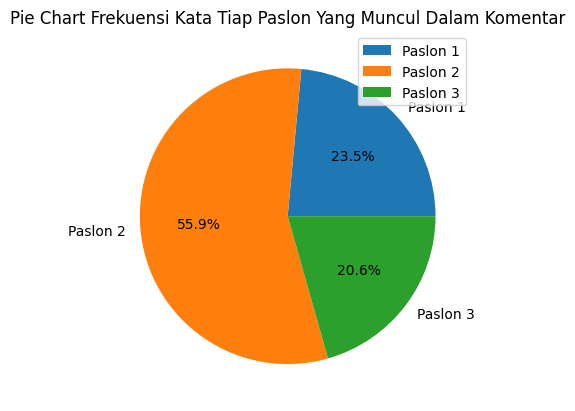

In [ ]:
import matplotlib.pyplot as plt

all_paslon_freq = [paslon1_freq, paslon2_freq,paslon3_freq]
all_paslon_lab = ["Paslon 1", "Paslon 2", "Paslon 3"]

# Membuat pie chart
plt.pie(all_paslon_freq, labels=all_paslon_lab, autopct='%1.1f%%')

# Menambahkan judul dan label
plt.title("Pie Chart Frekuensi Kata Tiap Paslon Yang Muncul Dalam Komentar")
plt.legend()

# Menampilkan pie chart
plt.show()

In [ ]:
#@title Clustering dengan Kmeans dengan jumlah cluster 2

In [ ]:
#@markdown Sebelum dilakukan clustering, dilakukan ekstraksi fitur dengan TFIDF, karena sudah dilakukan preprocessing diawal jadi tidak perlu dilakukan preprocessing lagi
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['Comment'].tolist()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
#@markdown Setelah melakukan ekstraksi fitur dengan tfidf, lalu dilakukan clustering dengan kmeans dengan menggunakan 2 jumlah klaster, karena clustering dengan kmeans ini bertujuan untuk membuat cluster mengenai respon terkait film Dirty Vote
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['Klaster'] = labels

In [ ]:
df.head()

,Name,Comment,Time,Likes,Reply Count,Klaster
0,@teguhhadyanto,komentar komentar buzzerp seragam,2/12/24 21:26,1,0.0,0
1,@ngkimwarkiman5388,moga indonesia jangan tinggal nama,2/12/24 21:26,0,0.0,0
2,@hermawanbasri117,sadar diri yg memang amanah tiap langkah gerak...,2/12/24 21:26,0,0.0,0
3,@winarnijhonwinarnijhon.2018,sore aku dapat amplop nama calon ada sama ada ...,2/12/24 21:26,0,0.0,0
4,@rizkifauzan4579,02,2/12/24 21:26,0,0.0,1


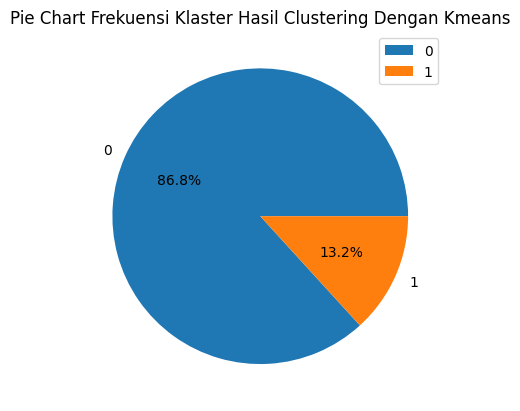

In [ ]:
#@title Plot Pie Chart Untuk Klaster/Segmen Hasil Clustering Dengan Kmeans
import matplotlib.pyplot as plt

all_paslon_freq = [len(df[df['Klaster'] == 0]), len(df[df['Klaster'] == 1])]
all_paslon_lab = ["0", "1"]

# Membuat pie chart
plt.pie(all_paslon_freq, labels=all_paslon_lab, autopct='%1.1f%%')

# Menambahkan judul dan label
plt.title("Pie Chart Frekuensi Klaster Hasil Clustering Dengan Kmeans")
plt.legend()

# Menampilkan pie chart
plt.show()

In [ ]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import torch
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
# from google_play_scraper import Sort, reviews_all, reviews
import nltk
# import calendar
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzippin

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
label = ['positif', 'netral', 'negatif']
# Load pre-trained model and tokenizer
model_name = "ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Example input text
input_text = "aku cinta indonesia"

# Tokenize input text
input_ids = tokenizer.encode(input_text, add_special_tokens=True, max_length=1024, truncation=True, return_tensors='pt').to(device)

# Perform inference
with torch.no_grad():
    outputs = model(input_ids)
    logits = outputs.logits

# Get predicted label
predicted_label = torch.argmax(logits, dim=1).item()
print("Predicted label:",label[predicted_label])

tokenizer_config.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/476k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/899 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Predicted label: positif


In [ ]:
output=[]
for i, val in df.iterrows():
    input_ids = tokenizer.encode(val['Comment'], add_special_tokens=True,  max_length=512, truncation=True,  return_tensors='pt').to(device)
    with torch.no_grad():
        try:
            outputs = model(input_ids)
        except:
            print(val['Comment'])
            break
        logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()
    output.append(label[predicted_label])

In [ ]:
df['label'] = output
df.head()

,Name,Comment,Time,Likes,Reply Count,Klaster,label
0,@teguhhadyanto,komentar komentar buzzerp seragam,2/12/24 21:26,1,0.0,0,netral
1,@ngkimwarkiman5388,moga indonesia jangan tinggal nama,2/12/24 21:26,0,0.0,0,negatif
2,@hermawanbasri117,sadar diri yg memang amanah tiap langkah gerak...,2/12/24 21:26,0,0.0,0,negatif
3,@winarnijhonwinarnijhon.2018,sore aku dapat amplop nama calon ada sama ada ...,2/12/24 21:26,0,0.0,0,netral
4,@rizkifauzan4579,02,2/12/24 21:26,0,0.0,1,positif


In [ ]:
review_all = []

for review in df['Comment']:
  text = review.split()
  for token_review in text:
    review_all.append(token_review)

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire dirty vote commnet")
freq_dist

how many frequency distribution samples from an entire dirty vote commnet


FreqDist({'yg': 3167, 'film': 1874, 'jadi': 1287, 'pilih': 1277, 'indonesia': 1013, 'orang': 1000, 'semua': 965, '02': 958, 'buat': 929, 'nya': 836, ...})

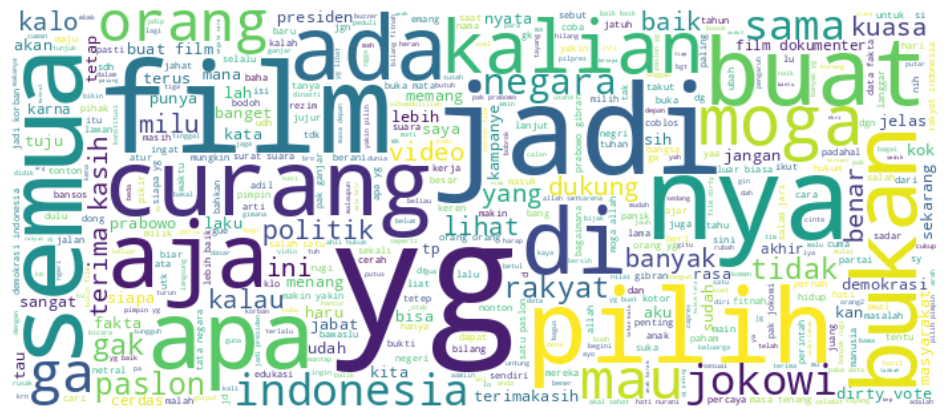

In [ ]:
join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()